# Извлекаем контент из XML-файла

Данные в формате XML имеют древовидную структуру. 

### Что такое дерево? Это структура, которая имеет узлы и связи между ними. Самый верхнеуровневый узел называется корнем, а всё, что находится в самом низу, называется листьями. 

В примере из прошлого юнита корнем является 'menu', а листьями, например, 'price' и 'weight'.

Кроме того, у 'menu' есть дети (потомки) — это два узла 'dish', имеющие разное значение атрибута 'name'.

Таким образом, в файле используется набор тегов, внутри которых могут находиться другие теги со своими значениями.

Для работы с XML-файлами мы будем использовать модуль ElementTree , входящий в стандартный пакет xml. Этот модуль позволит нам «перемещаться» по дереву XML и смотреть, что находится в каждом его узле, начиная с корня и заканчивая листьями.

Импортируем этот модуль под псевдонимом ET: 


In [1]:
# Импортируем модуль ElementTree
import xml.etree.ElementTree as ET

In [4]:
# Для работы со структурой файла menu.xml считаем его содержимое в переменную tree, выполнив код:
tree = ET.parse('data/menu.xml')

# Корень

Запишем в переменную root корневой узел дерева tree и посмотрим, как выглядит содержимое переменной root, для чего выполним код:

In [5]:
root = tree.getroot()
display(root)

<Element 'menu' at 0x000001D2A8E561B0>

Мы видим, что в корне находится 'menu'. Всё правильно, мы и предполагали увидеть именно это. 

Какой тип у этого объекта? Если мы вызовем встроенный в Python метод type() и передадим ему root , то увидим, что это тип xml.etree.ElementTree.Element. Такой тип будет у любого узла в дереве.

In [6]:
display(type(root))

xml.etree.ElementTree.Element

# Потомки

Для того чтобы посмотреть список потомков корневого узла, выполним следующий код:

In [7]:
display(list(root))

#Если у узла нет потомков, то вернётся пустой список — [].

[<Element 'dish' at 0x000001D2A8E573D0>,
 <Element 'dish' at 0x000001D2A8E57CE0>]

Итак, использование list(root) возвращает список потомков указанного узла. У узла root, который представляет меню, два потомка, а именно — два блюда, которые представлены тегами dish.

Для того чтобы получить список потомков второго блюда в нашем меню и вывести его на экран, выполним код:

In [13]:
display(list(root[1]))

[<Element 'price' at 0x000001D2A8E57420>,
 <Element 'weight' at 0x000001D2A8E57BA0>,
 <Element 'class' at 0x000001D2A8E570B0>]

# Атрибуты и теги

Как было сказано ранее, у узлов могут быть параметры, или атрибуты. Например, у узлов dish есть атрибут name, который хранит название блюда.

Мы можем непосредственно обратиться к атрибутам, используя attrib.

Выведем на экран атрибуты первого блюда из меню:

In [16]:
display(root[0].attrib)

{'name': 'Кура'}

В XML-узлах часто хранятся количественные показатели. Эти показатели хранятся в виде текста, и прочитать их можно, обратившись к атрибуту text у соответствующего объекта типа ElementTree.Element.

Например, возьмём узел price первого блюда из меню:

In [21]:
display(root[0][0])

<Element 'price' at 0x000001D2A8E57290>

Теперь прочитаем значение этого узла с помощью text:

In [26]:
display(root[0][2].text)

<Element 'class' at 0x000001D2A8E57600>

### Все значения в XML, даже числовые, хранятся как строки, поэтому преобразовывать их к нужному типу вам нужно самим.

Например, в данном случае можно обернуть значение стоимости в int() или float().

Если вы хотите прочитать наименование тега конкретного узла, необходимо использовать tag. Например, получим наименование тега корневого узла:

In [24]:
display(root.tag)

'menu'

# Использование циклов

### → Итак, мы научились обращаться к отдельным узлам дерева, представляющего XML-структуру, и извлекать информацию о его атрибутах, значении и потомках.

На этом шаге мы решим задачу вывода на экран наименование всех блюд из меню, а также информацию о них (иными словами, нам необходимо обойти дерево и вывести на экран значения его листьев).

Используя цикл for, автоматизируем обход дерева. Для этого напишем следующий код:

In [27]:
for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()

Кура price 40
Кура weight 300
Кура class Мясо

Греча price 20
Греча weight 200
Греча class Крупа



### В этом коде реализован следующий алгоритм:

1. В первом (внешнем) цикле перебираем потомков корня дерева (root). Потомки перебираются последовательно при помощи переменной dish. Это отдельные блюда из меню.

2. Во втором (вложенном) цикле аналогичным образом перебираем потомков каждого блюда. Этими потомками являются параметры блюда — его цена (price), вес (weight) и класс (class).

3. После этого выводим на экран название блюда (значение атрибута name), название очередного параметра (tag) и его значение (text).

4. Дополнительная функция print() в цикле верхнего уровня предназначена для организации более удобного восприятия информации — между отдельными блюдами будет выведена пустая строка.
На выходе получаем:

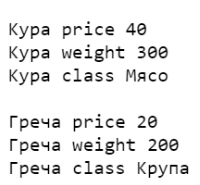